# Portugal students dataset
Dataset availble either from here> https://archive.ics.uci.edu/ml/datasets/student+performance
You can read more about it from the data description available 

In [22]:
# Importing necessary libaries, if you cant import them try to pip install them first. 
try: 
    import pandas as pd
except:
    print('installing pandas')
    !pip install pandas==0.25.1
    import pandas as pd

try:
    import numpy as np
except:
    print('installing numpy')
    !pip install numpy==1.19.5
    import numpy as np
try:
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
except:
    print('Installing matplot')
    !pip install matplot==3.1.1
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    
try:
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_predict, cross_val_score,KFold, RepeatedStratifiedKFold
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
    from sklearn.neural_network import MLPClassifier
except:
    print('installing scikit-learn')
    !pip install scikit-learn==0.24.2 
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_predict, cross_val_score,KFold, RepeatedStratifiedKFold
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
    from sklearn.neural_network import MLPClassifier

try:
    from scipy.stats import randint
except:
    print('Installing scipy')
    !pip install scipy==1.3.1
    from scipy.stats import randint


In [23]:
#See data description file for explanation of the different features
#Loading dataset, 
data = pd.read_csv('Portugal students/portugal-students.csv')
data.tail()
try:
    data.drop('DalcYN', inplace=True, axis=1)
except:
    print('Some versions have this feature I think but since not all, we will drop that one here')

We will first plot the data to see if we can see some feature correlation that may have a big effect on the outcome of classifying G3


In [24]:
#Function used in the other datasets to plot a feature
def plot_categs(df, category, fignum=1, title="Histogram of number of datapoints"):
    plt.figure(fignum)
    uniques= list(sorted(df[category].unique()))
    counts = [df[df[category] == value].shape[0] for value in uniques]
    size = len(uniques)
    xcoords = list(range(1, size+1))
    plt.bar(xcoords, counts)
    plt.xticks(xcoords, uniques, rotation='vertical' if size >= 5 else 'horizontal')
    plt.title((title if title is not None else ''))
    plt.tight_layout()

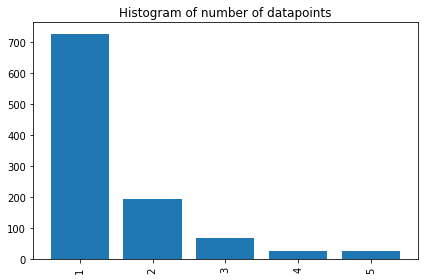

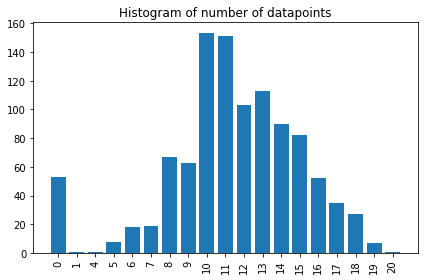

In [25]:
features = ['Dalc', 'G3']
for index, feature in enumerate(features):
    plot_categs(data, feature, fignum=index+1)

In [26]:
#Function that plots a subpopulation of a feature. 
#example how many of the people attending GP school failed
def subplot_categs(dfs, titles, category, fignum=1):
    plt.figure(fignum, figsize=(12, 6))
    number_of_dfs = len(titles)
    first_axis = None
    for df_index, df in enumerate(dfs):
        title = titles[df_index]
        uniques = list(sorted(df[category].unique()))
        counts = [df[df[category]==value].shape[0] for value in uniques]
        size = len(uniques)
        xcoords = list(range(1, size+1))
        if df_index == 0:
            first_axis =plt.subplot(1, 2, df_index+1)
        else:
            new_axis = plt.subplot(1, 2, df_index + 1, sharey=first_axis)
        plt.bar(xcoords, counts)
        plt.xticks(xcoords, uniques, rotation='vertical' if size >= 5 else 'horizontal')
        plt.title((title if title else ''))
        plt.tight_layout()

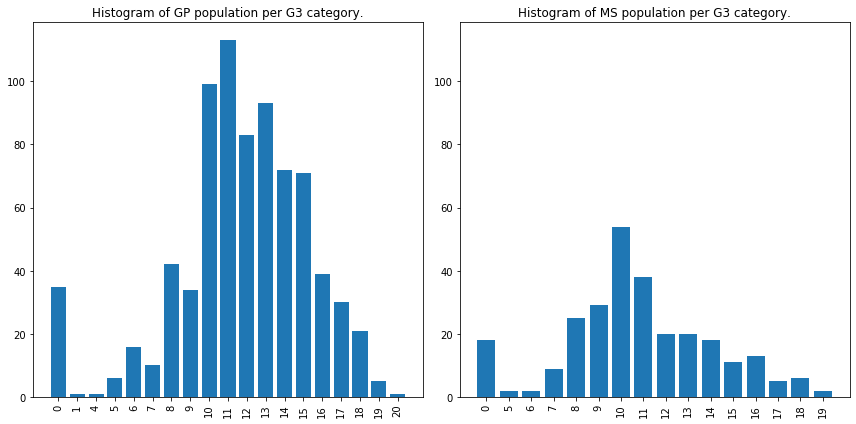

In [27]:
# Examining income category distribution among the male and female demographics
GP_data = data[data.school == 'GP']
MS_data = data[data.school == 'MS']
titles = ['Histogram of GP population per G3 category.', 'Histogram of MS population per G3 category.']
subplot_categs([GP_data, MS_data], titles, 'G3')


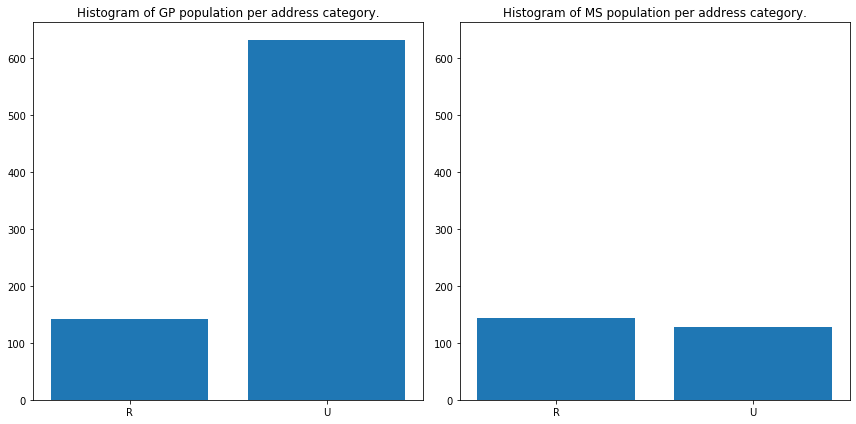

In [28]:
titles = ['Histogram of GP population per address category.', 'Histogram of MS population per address category.']
subplot_categs([GP_data, MS_data], titles, 'address')


In [29]:
#Drops the features nursery, higher, romantic, guardian
data.drop('nursery', inplace=True, axis=1)
data.drop('higher', inplace=True, axis=1)
data.drop('romantic', inplace=True, axis=1)
data.drop('guardian', inplace=True, axis=1)

In [30]:
#Binary features to binary values
GP_SCHOOL_LABEL, MS_SCHOOL_LABEL = (0,1)
URBAN_LABEL, RURAL_LABEL = (0,1)
FEMALE_LABEL, MALE_LABEL = (0, 1)
LOW_FAMSIZE_LABEL, HIGH_FAMSIZE_LABEL = (0,1)
DIV_PARENTS_LABEL, NOT_DIV_PARENTS_LABEL = (0,1)
YES_SCHOOL_SUP, NO_SCHOOL_SUP = (0,1)
YES_FAM_EDU_SUP, NO_FAM_EDU_SUP = (0,1)
YES_PAID_EXTRA_CLASS, NO_PAID_EXTRA_CLASS = (0,1)
YES_EXTRA_CURRICULAR, NO_EXTRA_CURRICULAR = (0,1)
INTERNET_AT_HOME, NO_INTERNET_HOME = (0,1)



data['school'] = data['school'].map({'GP':GP_SCHOOL_LABEL,'MS':MS_SCHOOL_LABEL}).astype(int)
data['address'] = data['address'].map({'U':URBAN_LABEL,'R':RURAL_LABEL}).astype(int)
data['sex'] = data['sex'].map({'F':FEMALE_LABEL,'M':MALE_LABEL}).astype(int)
data['famsize'] = data['famsize'].map({'LE3':LOW_FAMSIZE_LABEL,'GT3':HIGH_FAMSIZE_LABEL}).astype(int)
data['Pstatus'] = data['Pstatus'].map({'A':DIV_PARENTS_LABEL,'T':NOT_DIV_PARENTS_LABEL}).astype(int)
data['schoolsup'] = data['schoolsup'].map({'yes':YES_SCHOOL_SUP,'no':NO_SCHOOL_SUP}).astype(int)
data['famsup'] = data['famsup'].map({'yes':YES_FAM_EDU_SUP,'no':NO_FAM_EDU_SUP}).astype(int)
data['paid'] = data['paid'].map({'yes':YES_PAID_EXTRA_CLASS,'no':NO_PAID_EXTRA_CLASS}).astype(int)
data['activities'] = data['activities'].map({'yes':YES_EXTRA_CURRICULAR,'no':NO_EXTRA_CURRICULAR}).astype(int)
data['internet'] = data['internet'].map({'yes':INTERNET_AT_HOME,'no':NO_INTERNET_HOME}).astype(int)

data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,0,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,1,1,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,0,1,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,1,1,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,1,1,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [31]:
#nominal features handling with one-hot encoding

dataMjob = pd.get_dummies(data.Mjob)
data = pd.concat([data, dataMjob], axis=1)

dataFjob = pd.get_dummies(data.Fjob)
data = pd.concat([data, dataFjob], axis=1)

dataReason = pd.get_dummies(data.reason)
data = pd.concat([data, dataReason], axis=1)

data = data.drop(['Mjob'], axis=1)
data = data.drop(['Fjob'], axis=1)
data = data.drop(['reason'], axis=1)

data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,teacher,at_home,health,other,services,teacher,course,home,other,reputation
0,0,0,18,0,1,0,4,4,2,2,...,0,0,0,0,0,1,1,0,0,0
1,0,0,17,0,1,1,1,1,1,2,...,0,0,0,1,0,0,1,0,0,0
2,0,0,15,0,0,1,1,1,1,2,...,0,0,0,1,0,0,0,0,1,0
3,0,0,15,0,1,1,4,2,1,3,...,0,0,0,0,1,0,0,1,0,0
4,0,0,16,0,1,1,3,3,1,2,...,0,0,0,1,0,0,0,1,0,0


In [32]:
print('null?: ' , data.isnull().sum())
# Remove all missing values
for feature in data.columns:
    data[feature] = data[feature].replace(' ?', np.nan)
data.dropna(how='any', inplace=True)

null?:  school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
internet      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
at_home       0
health        0
other         0
services      0
teacher       0
at_home       0
health        0
other         0
services      0
teacher       0
course        0
home          0
other         0
reputation    0
dtype: int64


In [33]:
#Converting the G3 label into pass/fail *in portugal anything below 9 is considered fail
FAIL_LABEL, PASS_LABEL =(0,1) 
data.loc[data['G3'] <= 9 , 'G3'] = FAIL_LABEL
data.loc[data['G3'] >9, 'G3'] = PASS_LABEL
print(data.G3)


0       0
1       0
2       1
3       1
4       1
       ..
1039    1
1040    1
1041    0
1042    1
1043    1
Name: G3, Length: 1044, dtype: int64


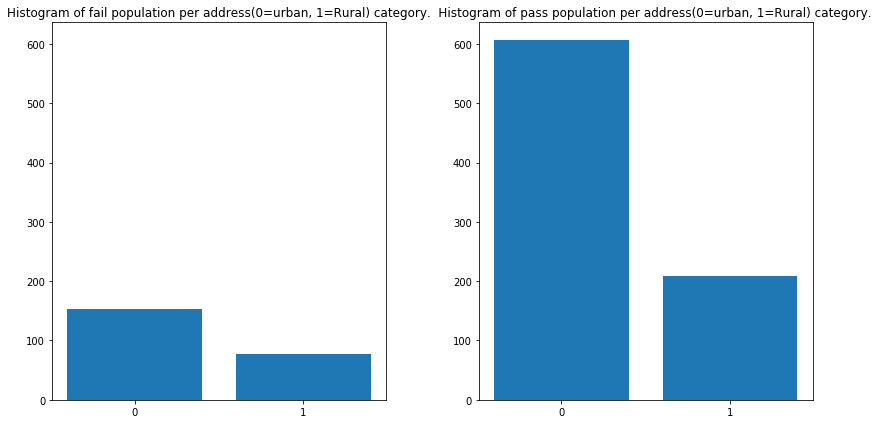

In [34]:
#Potential Bias 1
#There is a much larger of the total rural population that failed than the urban
fail_data = data[data.G3 == 0]
pass_data = data[data.G3 == 1]
titleso = ['Histogram of fail population per address(0=urban, 1=Rural) category.', '     Histogram of pass population per address(0=urban, 1=Rural) category.']
subplot_categs([fail_data, pass_data], titleso, 'address')

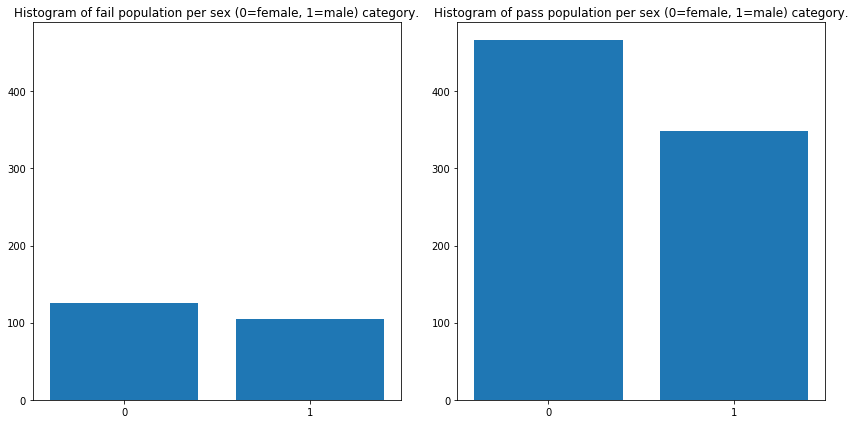

In [35]:
#Potential bias 2>
fail_data = data[data.G3 == 0]
pass_data = data[data.G3 == 1]
titleso = ['Histogram of fail population per sex (0=female, 1=male) category.', 'Histogram of pass population per sex (0=female, 1=male) category.']
subplot_categs([fail_data, pass_data], titleso, 'sex')

In [36]:
#Saving the feature used for prediction and splitting the dataset up
X_full = data.drop('G3',axis=1)
y_full = data['G3']
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.45, random_state=42)

In [37]:
#training MLP algorithm on the data with 1000 iterations
MLP_MAX_ITER=10000
model = MLPClassifier(max_iter=MLP_MAX_ITER)
model.fit(X_train,y_train)
prediction = model.predict(X_test)

In [38]:
#Cross validate scores between Random forest and MLP
def cross_validate(X = X_train,y = y_train):


    models = []
    models.append(('RF',RandomForestClassifier()))
    models.append(('MLP', MLPClassifier()))

    results = []
    names = []
    scoring ='accuracy'

    for name,model in models:
        #kfold = KFold(n_splits=10,random_state=42)
        kfold = RepeatedStratifiedKFold(n_splits=10,random_state=42,n_repeats=3)
        cv_results = cross_val_score(model,X,y,cv=kfold,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print (f'Model:{name},Mean: {cv_results.mean()},Std Dev: {cv_results.std()}')

In [39]:
cross_validate(X_train,y_train)

Model:RF,Mean: 0.9176446864287154,Std Dev: 0.03605373904360068


C:\Users\mariu\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mariu\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mariu\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mariu\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

Model:MLP,Mean: 0.9076729179270014,Std Dev: 0.03156477467750746


C:\Users\mariu\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [40]:
#For testing and accessing the accuracy
test_df = X_test.copy()
test_df['G3'] = y_test
test_df['pred'] = pd.Series(prediction, index=test_df.index)
test_df['accurate'] = (test_df['pred'] == test_df['G3'])
test_df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,other,services,teacher,course,home,other,reputation,G3,pred,accurate
629,0,0,17,1,1,1,2,1,2,2,...,0,1,0,0,0,0,1,1,1,True
1027,1,0,19,1,1,1,1,1,2,2,...,1,0,0,1,0,0,0,0,0,True
603,0,1,16,0,1,1,2,3,2,1,...,1,0,0,0,1,0,0,1,1,True
468,0,1,16,0,1,1,3,1,1,1,...,1,0,0,0,0,0,1,1,1,True
918,1,1,18,0,0,1,4,4,1,4,...,0,0,0,0,1,0,0,0,0,True


In [41]:
#Calculating independence according to fairness book
#P{R=1 | A=a} = P{R=1 | A=b}
#P{G3= 0 | address=0} = P{G3= 0 | address=1} 
#P{G3=1 | address=0} = P{G3=1 | address=1}
#or at least within 80% of each other
#Urban = 0, Rural =1

#True positive for rural address urban
tpY =  test_df.query("address == 0 & G3==1 & accurate==True").shape[0]
print("True Positive(G3=1): Urban and passed the last year",tpY)
#False positive for urban address
fpY = test_df.query("address == 0 & G3==1 & accurate==False").shape[0]
print("False Positive(G3=1): Urban and predicted falsly passed the last year",fpY)

#True negative for urban people
tnY = test_df.query("address == 0 & G3 == 0 & accurate==True").shape[0]
print("True negative(G3=0): Urban and failed the last year",tnY)
#False negative for urban people
fnY  = test_df.query("address == 0 & G3 == 0 & accurate==False").shape[0]
print("False negative(G3=0): Urban and predicted falsly failed last year",fnY)

#True Positive for Rural people
tpO = test_df.query("address == 1 & G3 == 1 & accurate==True").shape[0]
print("True Positive(G3=1): Rural and passed last year", tpO)
#False Positive for Rural people
fpO = test_df.query("address == 1 & G3 == 1 & accurate==False").shape[0]
print("False Positive(G3=1): Rural and falsly predicted passed last year", fpO)

#True Negative for Rural people
tnO = test_df.query("address == 1 & G3 == 0 & accurate==True").shape[0]
print("True Negative(G3=0): Rural and failed last year", tnO)
#False Negative for rural people
fnO = test_df.query("address == 1 & G3 == 0 & accurate==False").shape[0]
print("False Negative(G3=0): Rural and falsly predicted failed last year",fnO)

#Total predicted negative for urban people
pred_negY = test_df.query("address == 0 & G3 == 0").shape[0]
print("Total predicted negative with address urban and failed:", pred_negY)

#Total predicted positive urban people
pred_posY = test_df.query("address == 0 & G3 == 1").shape[0]
print("Total predicted positive for urban", pred_posY)

#Total predicted negative rural people
pred_negO = test_df.query("address == 1 & G3==0").shape[0]
print("Total predicted negative for rural people:", pred_negO)

#Total predicted positive for rural people
pred_posO =  test_df.query("address == 1 & G3 == 1").shape[0]
print("Total predicted positive for rural people", pred_posO)

#Indepence calculation
print("Urban and failed:", pred_negY, "predicted failed out of", pred_posY+pred_negY, " = ", (pred_negY/(pred_posY+pred_negY)*100))
print("Urban and passed:", pred_posY, '/', pred_posY+pred_negY, '= ', (pred_posY/(pred_posY+pred_negY))*100, "%")
print("Rural and failed:", pred_negO, '/', pred_posO+pred_negO, '= ', (pred_negO/(pred_posO+pred_negO))*100, "%")
print("Rural and passed:", pred_posO,'/', pred_posO+pred_negO,'= ', (pred_posO/(pred_posO+pred_negO))*100, "%")

True Positive(G3=1): Urban and passed the last year 259
False Positive(G3=1): Urban and predicted falsly passed the last year 10
True negative(G3=0): Urban and failed the last year 64
False negative(G3=0): Urban and predicted falsly failed last year 24
True Positive(G3=1): Rural and passed last year 72
False Positive(G3=1): Rural and falsly predicted passed last year 13
True Negative(G3=0): Rural and failed last year 23
False Negative(G3=0): Rural and falsly predicted failed last year 5
Total predicted negative with address urban and failed: 88
Total predicted positive for urban 269
Total predicted negative for rural people: 28
Total predicted positive for rural people 85
Urban and failed: 88 predicted failed out of 357  =  24.649859943977592
Urban and passed: 269 / 357 =  75.35014005602241 %
Rural and failed: 28 / 113 =  24.778761061946902 %
Rural and passed: 85 / 113 =  75.22123893805309 %


We conclude from our indepence calculation that there is no inherent bias towards one of the options above, you are equally likely to be predicted to fail if you are rural as if you are urban. 